In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df = pd.read_pickle('files/preprosessed.pkl')

In [46]:
from sklearn.model_selection import train_test_split
features =  list(df.drop(columns=['price.mainValue','id','Unnamed: 0.1'],axis=1))
X = df[features]
y = df['price.mainValue']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
dummy_median = DummyRegressor(strategy='mean')
dummy_regressor = dummy_median.fit(X_train,y_train)
dummy_predicts = dummy_regressor.predict(X_test)
print("Model Accuracy:", dummy_regressor.score(X_test,y_test)*100)
print('$',mean_absolute_error(y_test,dummy_predicts))

Model Accuracy: -0.594864354995539
$ 129701.84278189455


In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
models = [
          DecisionTreeRegressor(criterion='mse',max_depth=11,random_state=100),
          GradientBoostingRegressor(n_estimators=200,max_depth=12, verbose=2),
            RandomForestRegressor(min_samples_leaf =1, n_estimators=100,criterion='mse',max_depth=20,random_state=100,verbose=2)]
learning_mods = pd.DataFrame()
temp = {}

score on training 0.9999840568282669
r2 score 0.7724647387219437 

RandomForestRegressor(max_depth=20, random_state=100, verbose=2)
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
DecisionTreeRegressor(max_depth=11, random_state=100)
score on training 0.9783559557561411
r2 score 0.6893467582351993 

GradientBoostingRegressor(max_depth=12, n_estimators=200, verbose=2)
      Iter       Train Loss   Remaining Time 
         1 55708468809.3663            5.76s
         2 45321359303.8547            5.24s
         3 36891892262.6912            6.53s
         4 30058268664.0145            6.37s
         5 24499242047.0752            6.59s
         6 19977116999.9738            6.61s
         7 16292313532.0767            6.86s
         8 13307811781.6034            6.73s
         9 10869121720.8225            6.55s
        10  8886565311.1491            6.50s
        11  727785312

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


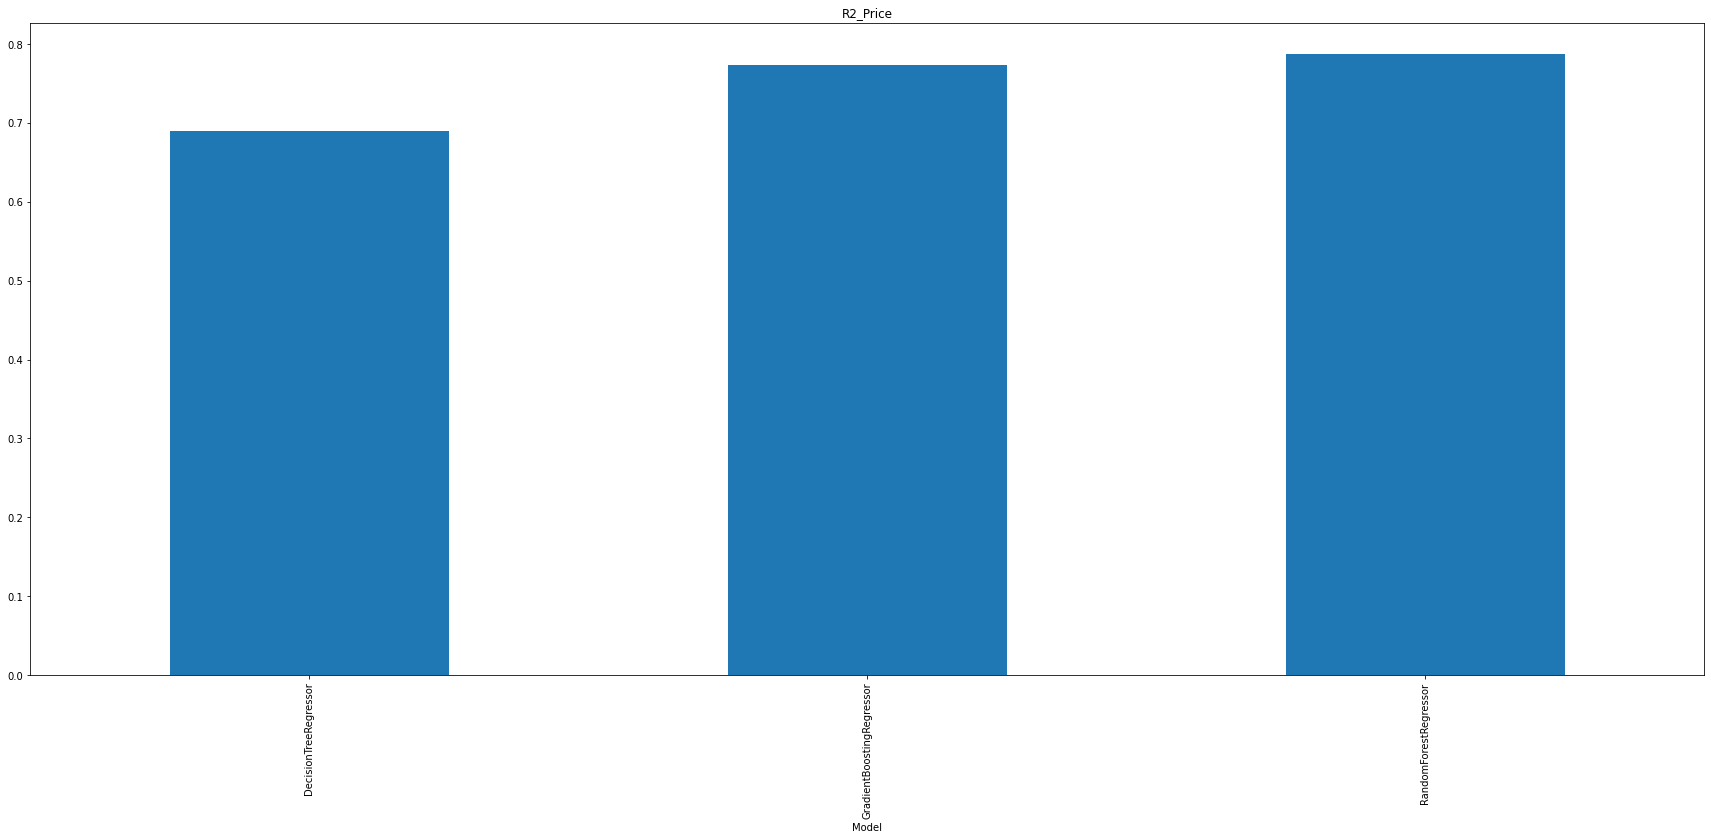

In [50]:
#run through models
for model in models:
    print(model)
    m = str(model)
    temp['Model'] = m[:m.index('(')]
    model.fit(X_train, y_train)
    temp['R2_Price'] = r2_score(y_test, model.predict(X_test))
    print('score on training',model.score(X_train, y_train))
    print('r2 score',r2_score(y_test, model.predict(X_test)),'\n')
    learning_mods = learning_mods.append([temp])
learning_mods.set_index('Model', inplace=True)

fig, axes = plt.subplots(ncols=1, figsize=(30, 12))
learning_mods.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')
plt.show()

In [51]:
regressionTree_imp = model.feature_importances_

In [52]:
data_tuples = list(zip(features,regressionTree_imp.tolist()))
features_importance = pd.DataFrame(data_tuples, columns=['Feature','Value'])

In [53]:
print(len(features_importance))
unimportant_features = features_importance[features_importance['Value'] < .001]
features_importance = features_importance[features_importance['Value'] > .001]
print(len(features_importance))

101
35


In [54]:
features_importance = features_importance.sort_values(by=['Value'], ascending=False)
pd.set_option('display.float_format', lambda x: '%.1000f' % x)
features_importance

,Feature,Value
1,property.netHabitableSurface,0.622245524868991206624002643366111442446708679...
9,Living area,0.113420366290324592384308743930887430906295776...
58,property.location.postalCode_2000,0.033988223721815834232895525701678707264363765...
4,Construction year,0.025896594259504430307616829054495610762387514...
10,Living room surface,0.017676963742191291462102498144304263405501842...
3,Bathrooms,0.015676130332528761396337912970011529978364706...
6,E-level (primary energy consumption),0.013958944902094051407348551663289981661364436...
13,Cadastral income,0.012731397802590886311757678583944652928039431...
18,Terrace surface,0.012396403679018641943998524368453217903152108...
0,property.bedroomCount,0.011541333655399804714036804398347157984972000...


In [55]:
data_tuples = list(zip(y_test,model.predict(X_test)))
voorspellingen = pd.DataFrame(data_tuples, columns=['Echte Waarde','Voorspelling'])
voorspellingen['Voorspelling'] = voorspellingen['Voorspelling'].astype(int)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [59]:
voorspellingen.astype(int)

,Echte Waarde,Voorspelling
0,149000,194648
1,150000,197054
2,379000,516095
3,165000,218263
4,279000,199867
...,...,...
402,199900,196170
403,230000,720204
404,150000,272618
405,285500,863475
